In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pandas 基础操作

* **1 Pandas基本数据操作**
    * **1.1 索引操作**
        * 1.1.1 直接使用列行索引的名字
        * 1.1.2 结合loc和iloc使用索引
        * 1.1.3 组合使用索引
    * **1.2 赋值操作**
    * **1.3 排序操作**
        * 1.3.1 Series 排序
        * 1.3.2 DataFrame排序
    * **1.4 运算操作**
        * 1.4.1 算术运算
        * 1.4.2 逻辑运算
        * 1.4.3 统计运算
            * 1.4.3.1 describe
            * 1.4.3.2 统计函数
            * 1.4.3.3 累计统计函数
        * 1.4.4 自定义运算apply


* **2 Pandas画图**
    * df.plot()


* **3 Pandas文件操作**
    * 3.1 CSV文件(或txt文件)
    * 3.2 数据库交互


# 1 Pandas 基本数据操作

在这里主要介绍了pandas的4种基本数据操作。
* 索引操作
    * loc:只能指定行列索引的名字进行索引
    * iloc:只能指定索引的下标进行索引
* 赋值操作：更改数据值
* 排序操作：
    * sort_values:对值进行排序
    * sort_index：对索引进行排序
* 运算操作
    * 算术运算：应用add等函数实现数据间的算术运算
    * 逻辑运算：应用逻辑运算符号实现数据的筛选
    * 统计运算：应用常用的统计函数实现统计运算
    * 自定义运算apply：实现函数的自定义处理

为了更好的理解这些基本操作，我们将读取一个真实的股票数据。关于文件操作，后面在介绍，这里只先用一下API

In [2]:
# 读取文件
data = pd.read_csv("../data/stock_day.csv")

# 删除一些列，让数据更简单些，方便理解
data = data.drop(['ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20'], axis=1)
data

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58
...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,6.16
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,3.19
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,2.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,4.76


## 1.1 索引操作
Numpy当中我们已经讲过使用索引选取序列和切片选择，pandas也支持类似的操作，也可以直接使用列名、行名,甚至组合使用。

### 1.1.1 直接使用列行索引的名字（先列后行）
现在想要获取'2018-02-27'这天的'close'的结果

In [3]:
# 直接使用列行索引名字的方式
data['open']['2018-02-27']

23.53

* 注意：是先选列，在选行

### 1.1.2 结合loc和iloc使用索引（推荐）
* **df.loc**: 只能指定行列索引的名字
* **df.iloc**: 只能指定索引的下标进行获取

现在想要获取从‘2018-02-27’到‘2018-02-22’的‘open’的结果

In [4]:
# 使用loc:只能指定行列索引的名字
data.loc['2018-02-27':'2018-02-22', 'open']

2018-02-27    23.53
2018-02-26    22.80
2018-02-23    22.88
2018-02-22    22.25
Name: open, dtype: float64

* 现在想要获取前3天数据,前5列的结果

In [5]:
# 使用iloc可以通过索引的下标去获取
data.iloc[:3, :5]

,open,high,close,low,volume
2018-02-27,23.53,25.88,24.16,23.53,95578.03
2018-02-26,22.80,23.78,23.53,22.80,60985.11
2018-02-23,22.88,23.37,22.82,22.71,52914.01


### 1.1.3 组合使用索引
假如现在想要获取第1天到第4天，['open', 'close', 'high', 'low']这个四个指标的结果,该怎么处理？

* 可以使用loc或iloc来获取

In [6]:
# 使用loc方式
data.loc[data.index[0:4], ['open', 'close', 'high', 'low']]

,open,close,high,low
2018-02-27,23.53,24.16,25.88,23.53
2018-02-26,22.80,23.53,23.78,22.80
2018-02-23,22.88,22.82,23.37,22.71
2018-02-22,22.25,22.28,22.76,22.02


In [7]:
# 使用iloc
data.iloc[0:4, data.columns.get_indexer(['open', 'close', 'high', 'low'])]

,open,close,high,low
2018-02-27,23.53,24.16,25.88,23.53
2018-02-26,22.80,23.53,23.78,22.80
2018-02-23,22.88,22.82,23.37,22.71
2018-02-22,22.25,22.28,22.76,22.02


## 1.2 赋值操作
现在想要对DataFrame中的‘close’列进行重新赋值为1

In [8]:
# 直接修改原来的值
data['close'] = 1

# 或者
data.close = 1
data.head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,1,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,1,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,1,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,1,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,1,21.48,23331.04,0.44,2.05,0.58


## 1.3 排序操作
排序有两种形式，一种对于索引进行排序，一种对于内容进行排序
* sort_values:对值进行排序
* sort_index：对索引进行排序

Series和DataFrame都可使用这两种方法

### 1.3.1 Series 排序

使用series.sort_values(ascending=True)进行排序

In [9]:
# 重新导入股票时间
data = pd.read_csv('../data/stock_day.csv')

# 对‘p_change’进行值排序，ascending=True，从小到大
data['p_change'].sort_values(ascending=True).head()

2015-09-01   -10.03
2015-09-14   -10.02
2016-01-11   -10.02
2015-07-15   -10.02
2015-08-26   -10.01
Name: p_change, dtype: float64

* 使用series.sort_index()进行排序

In [10]:
# 对‘p_change’进行索引排序
data['p_change'].sort_index().head()

2015-03-02    2.62
2015-03-03    1.44
2015-03-04    1.57
2015-03-05    2.02
2015-03-06    8.51
Name: p_change, dtype: float64

### 1.3.2 DataFrame排序

* 使用df.sort_values(by=, ascending=)
    * by：指定排序参考的键（单键或多键）
    * ascending:默认升序
* 使用df.sort_index给索引进行排序


In [11]:
# 按照‘open’大小进行排序
data.sort_values(by='open', ascending=True).head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-09-02,12.30,14.11,12.36,12.30,70201.74,-1.10,-8.17,14.440,16.591,18.360,96977.99,98537.72,104567.25,2.40
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19


In [12]:
# 按照‘open’和‘high’进行排序，会先比较‘open’值，若相等在比较‘high’
data.sort_values(by=['open', 'high']).head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-09-02,12.30,14.11,12.36,12.30,70201.74,-1.10,-8.17,14.440,16.591,18.360,96977.99,98537.72,104567.25,2.40
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19


In [13]:
# 这个股票的日期索引原来是从大到小，现在重新排序，从小到大
data.sort_index()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53


## 1.4 运算操作

* 算术运算：应用add等函数实现数据间的算术运算
* 逻辑运算：应用逻辑运算符号实现数据的筛选
* 统计运算：应用常用的统计函数实现统计运算
* 自定义运算apply：实现函数的自定义处理

### 1.4.1 算术运算
进行数学的算术运算，常用的函数如下表：

| 方法 | 描述 |
| :-----:| :----: |
| add,radd | 加法（ + ）|
| sub,rsub | 减法（ - ）|
| div,rdiv | 除法（ / ) |
| floordiv,rfloordiv | 整除( // ) |
| mul.rmul | 乘法（ * ) |
| pow, rpow | 幂次方（ ** ）|

* 注意：函数前面加r之后的区别
    * a.sub(b) = a - b
    * a.rsub(b) = b - a

In [14]:
# 首先查看‘open’列前5行的值
data['open'].head(5)

2018-02-27    23.53
2018-02-26    22.80
2018-02-23    22.88
2018-02-22    22.25
2018-02-14    21.49
Name: open, dtype: float64

In [15]:
# 查看‘open’列减去1，前5行的值
data['open'].sub(1).head(5)

2018-02-27    22.53
2018-02-26    21.80
2018-02-23    21.88
2018-02-22    21.25
2018-02-14    20.49
Name: open, dtype: float64

In [16]:
# 查看 1减去‘open’列的值，前5行的值
data['open'].rsub(1).head()

2018-02-27   -22.53
2018-02-26   -21.80
2018-02-23   -21.88
2018-02-22   -21.25
2018-02-14   -20.49
Name: open, dtype: float64

### 1.4.2 逻辑运算

#### 1.4.2.1 逻辑运算符号
我们可以应用逻辑运算符号实现数据的筛选

例如我们想要筛选data['open'] > 23的日期数据：data[data['open'] > 23]

In [17]:
# data['open'] > 23返回的逻辑结果,True或False
data['open'] > 23

2018-02-27     True
2018-02-26    False
2018-02-23    False
2018-02-22    False
2018-02-14    False
              ...  
2015-03-06    False
2015-03-05    False
2015-03-04    False
2015-03-03    False
2015-03-02    False
Name: open, Length: 643, dtype: bool

In [18]:
# 逻辑判断的结果可以作为筛选的依据
data[data['open'] > 23].head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-01,23.71,23.86,22.42,22.22,66414.64,-1.30,-5.48,23.646,24.365,24.279,52812.35,80394.43,88480.92,1.66
2018-01-31,23.85,23.98,23.72,23.31,49155.02,-0.11,-0.46,24.036,24.583,24.411,60348.94,80496.48,91666.75,1.23
2018-01-30,23.71,24.08,23.83,23.70,32420.43,0.05,0.21,24.350,24.671,24.365,77485.53,84805.23,92943.35,0.81
2018-01-29,24.40,24.63,23.77,23.72,65469.81,-0.73,-2.98,24.684,24.728,24.294,91842.60,91692.73,93456.22,1.64


* 也可以完成多个逻辑判断：‘open’在23到24之间

In [19]:
# 进行多个逻辑判断
data[(data['open'] > 23) & (data['open'] < 24)].head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-01,23.71,23.86,22.42,22.22,66414.64,-1.30,-5.48,23.646,24.365,24.279,52812.35,80394.43,88480.92,1.66
2018-01-31,23.85,23.98,23.72,23.31,49155.02,-0.11,-0.46,24.036,24.583,24.411,60348.94,80496.48,91666.75,1.23
2018-01-30,23.71,24.08,23.83,23.70,32420.43,0.05,0.21,24.350,24.671,24.365,77485.53,84805.23,92943.35,0.81
2018-01-16,23.40,24.60,24.40,23.30,101295.42,0.96,4.10,23.908,24.058,23.321,82003.73,101081.47,74590.92,2.54


#### 1.4.2.2 逻辑运算函数
* df.query(expr):expr是查询字符串
* df.isin(values):判断df里是否包含values

In [20]:
# 通过df.query来筛选'open'在23和24之间的数据
data.query("open < 24 & open > 23").head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-01,23.71,23.86,22.42,22.22,66414.64,-1.30,-5.48,23.646,24.365,24.279,52812.35,80394.43,88480.92,1.66
2018-01-31,23.85,23.98,23.72,23.31,49155.02,-0.11,-0.46,24.036,24.583,24.411,60348.94,80496.48,91666.75,1.23
2018-01-30,23.71,24.08,23.83,23.70,32420.43,0.05,0.21,24.350,24.671,24.365,77485.53,84805.23,92943.35,0.81
2018-01-16,23.40,24.60,24.40,23.30,101295.42,0.96,4.10,23.908,24.058,23.321,82003.73,101081.47,74590.92,2.54


In [21]:
# 判断'open'列是否是23.53和23.85
data['open'].isin([23.53,23.85])

2018-02-27     True
2018-02-26    False
2018-02-23    False
2018-02-22    False
2018-02-14    False
              ...  
2015-03-06    False
2015-03-05    False
2015-03-04    False
2015-03-03    False
2015-03-02    False
Name: open, Length: 643, dtype: bool

In [22]:
# 筛选出'open'列包含23.53和23.85的数据
data[data['open'].isin([23.53, 23.85])]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-01-31,23.85,23.98,23.72,23.31,49155.02,-0.11,-0.46,24.036,24.583,24.411,60348.94,80496.48,91666.75,1.23
2017-07-26,23.53,23.92,23.40,22.85,110276.48,-0.30,-1.27,23.200,22.718,22.286,130237.86,140918.73,160464.67,2.76
2015-12-18,23.53,24.66,23.99,23.43,109230.05,0.65,2.79,22.834,22.264,22.163,66728.10,68518.08,68161.18,3.74
2015-11-26,23.85,24.08,23.53,23.50,51446.29,-0.31,-1.30,23.710,24.357,23.395,74550.04,110489.85,109815.49,1.76


### 1.4.3 统计运算
* describe可以直接得出很多统计结果
* 统计函数：可以实现很多统计计算，比如平均值、中位数等
* 累计统计函数：可以实现很多累计统计运算，比如累计和等

#### 1.4.3.1 describe
综合分析: 能够直接得出很多统计结果,count, mean, std, min, max 等

In [23]:
# 查询data数据概览
data.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,21.272706,21.900513,21.336267,20.771835,99905.519114,0.018802,0.190280,21.302362,21.267656,21.200946,100008.642691,100287.542177,100797.518398,2.936190
std,3.930973,4.077578,3.942806,3.791968,73879.119354,0.898476,4.079698,3.880640,3.813602,3.686186,62761.578326,56759.082060,50101.575639,2.079375
min,12.250000,12.670000,12.360000,12.200000,1158.120000,-3.520000,-10.030000,12.520000,12.520000,12.520000,10804.740000,19130.510000,23311.000000,0.040000
25%,19.000000,19.500000,19.045000,18.525000,48533.210000,-0.390000,-1.850000,18.990000,19.102000,19.275000,55794.985000,59861.955000,64103.675000,1.360000
50%,21.440000,21.970000,21.450000,20.980000,83175.930000,0.050000,0.260000,21.504000,21.623000,21.530000,86133.330000,89234.970000,96291.730000,2.500000
75%,23.400000,24.065000,23.415000,22.850000,127580.055000,0.455000,2.305000,23.318000,23.098500,23.136000,127655.655000,124693.255000,124001.015000,3.915000
max,34.990000,36.350000,35.210000,34.010000,501915.410000,3.030000,10.030000,33.696000,32.186000,29.998000,404443.540000,360028.160000,269280.790000,12.560000


#### 1.4.3.2 统计函数
| 函数名 | 描述 |
| :-----:|:-----:|
| count | 非NA值的数量|
| min,max | 计算最小值和最大值|
| idxmin,idxmax | 计算能够获取到最小值和最大值的索引值|
| argmin,argmax | 计算能够获取到最小值和最大值的索引位置|
| quantile| 计算样本的分位数（0到1）|
| sum| 值的总和|
| mean | 值的平均数|
| median | 值的算术中位数|
| mode | 众数|
| std | 标准差|
| var | 方差|

* 注意axis值的问题，默认axis=0,默认跨行操作，也就是求每一列的统计值。

In [24]:
# 求每一列的方差
data.var(axis=0)

open            1.545255e+01
high            1.662665e+01
close           1.554572e+01
low             1.437902e+01
volume          5.458124e+09
price_change    8.072595e-01
p_change        1.664394e+01
ma5             1.505937e+01
ma10            1.454356e+01
ma20            1.358797e+01
v_ma5           3.939016e+09
v_ma10          3.221593e+09
v_ma20          2.510168e+09
turnover        4.323800e+00
dtype: float64

#### 1.4.3.3 累计统计函数
| 函数名 | 描述 |
| :-----:|:-----:|
| cumsum | 计算前n个数的和|
| cummax | 计算前n个数的最大值|
| cummin | 计算前n个数的最小值|
| cumprod | 计算前那个数的积|

该如何使用累计统计函数呢？
比如，我们现在想要按照时间的顺序来进行累计股票的涨幅程度。
* 首先对数据的时间进行排序

In [25]:
# 显示源数据，发现时间是倒着的
data.head(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58
2018-02-13,21.40,21.90,21.48,21.31,30802.45,0.28,1.32,21.342,22.103,23.387,39694.65,45518.14,65161.68,0.77
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,21.504,22.338,23.533,44645.16,45679.94,68686.33,0.81
2018-02-09,21.20,21.46,20.36,20.19,54304.01,-1.50,-6.86,21.920,22.596,23.645,48624.36,48982.38,70552.47,1.36
2018-02-08,21.79,22.09,21.88,21.75,27068.16,0.09,0.41,22.372,23.009,23.839,44411.98,48612.16,73852.45,0.68
2018-02-07,22.69,23.11,21.80,21.29,53853.25,-0.50,-2.24,22.480,23.258,23.929,52281.28,56315.11,74925.33,1.35


In [26]:
# 对时间进行排序
data = data.sort_index()
data.head(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16
2015-03-09,14.14,14.85,14.31,13.80,144945.66,0.03,0.21,13.470,13.312,13.312,124820.96,120066.09,120066.09,4.96
2015-03-10,14.20,14.80,14.65,14.01,101213.51,0.34,2.38,13.860,13.503,13.503,117249.34,117372.87,117372.87,3.46
2015-03-11,14.80,15.08,14.30,14.14,119708.43,-0.35,-2.39,14.140,13.603,13.603,127775.94,117664.81,117664.81,4.10
2015-03-12,14.11,14.80,14.11,13.95,84978.37,-0.19,-1.33,14.330,13.659,13.659,126135.54,114032.98,114032.98,2.91
2015-03-13,14.13,14.50,14.47,14.08,61342.22,0.36,2.55,14.368,13.740,13.740,102437.64,108763.91,108763.91,2.10


* 对p_change进行累计求和

In [27]:
# 对p_change进行累计求和
stock_rise = data['p_change']
stock_rise.cumsum()

2015-03-02      2.62
2015-03-03      4.06
2015-03-04      5.63
2015-03-05      7.65
2015-03-06     16.16
               ...  
2018-02-14    112.59
2018-02-22    114.23
2018-02-23    116.65
2018-02-26    119.67
2018-02-27    122.35
Name: p_change, Length: 643, dtype: float64

* 数据不太好展示涨幅效果，所以使用折线图来展示数据

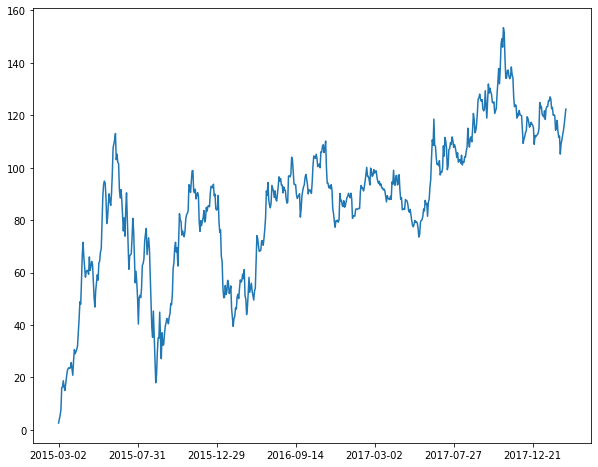

In [28]:
# 使用Pandas自带的画图api
stock_rise.cumsum().plot(figsize=(10, 8))

### 1.4.4 自定义运算apply
* apply(func, axis=0)
    * func:自定义函数
    * axis：axis=0表示跨行操作，axis=1表示跨列操作

* 假设我们想要知道'open'和'close'两列的最大值减去最小值的值

In [29]:
# 我们首先定义个lambda函数，然后使用apply函数
data[['open', 'close']].apply(lambda x: x.max() - x.min(), axis=0)

open     22.74
close    22.85
dtype: float64

# 2 Pandas 画图
* Pandas自带的画图api是在matplotlib库的基础上集成的，详细内容可以查看matplotlib的文档

* DataFrame.plot(kind='line')
    * kind : str，需要绘制图形的种类
        * ‘line’ : 折线图 (default)
        * ‘bar’ : 竖直柱状图
        * ‘barh’ : 水平柱状图
        * ‘hist’ : 直方图
        * ‘pie’ : 饼状图
        * ‘scatter’ : 散点图
        
    * 其他详细参数可以查看文档

* 现在我们想要画出'close'收盘价的折线图

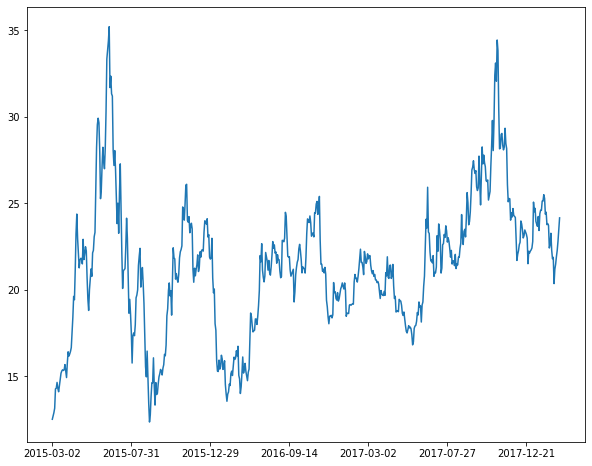

In [30]:
data['close'].plot(figsize=(10, 8))

# 3 Pandas 文件操作

我们的数据大部分存储于文件当中，所以pandas可以支持复杂的IO操作，pandas的API支持众多的文件格式，如CSV，SQL，Excel，JSON，HDF5。下图整理了常用的文件操作，其中CSV文件操作是最常用的，它可以处理常见的csv文件和txt文件。

| Format Type | Data Description | Reader | Writer |
| :-----:|:-----:|:-----:|:-----:|
|text   |CSV            |read_csv|   to_csv  |
|text   |JSON           |read_json|   to_json  |
|text   |HTML           |read_html|   to_html  |
|text   |local clipboard   |read_clipboard|   to_clipboard  |
|binary   |MS Excel        |read_excel|   to_excel  |
|binary   |HDF5           |read_hdf|   to_hdf  |
|binary   |Feather         |read_feather|   to_feather  |
|binary   |Stata          |read_stata|   to_stata  |
|binary   |SAS            |read_sas|    |
|binary   |Python Pickle     |read_pickle|   to_pickle  |
|sql   |SQL            |read_sql|   to_sql  |
|sql   |Google Big Query   |read_gbq|   to_gbq  |



## 3.1 CSV文件(或txt文件)

可以使用read_csv函数读取csv文件或者txt文件，如果txt文件有自定义的分隔符，可以用read_csv里的‘sep’参数进行分隔符设置即可。

### 3.1.1 read_csv
* pandas.read_csv(filepath_or_buffer, sep =',', usecols )
    * filepath_or_buffer:文件路径
    * sep :分隔符，默认用","隔开
    * usecols:指定读取的列名，列表形式


* 举例：读取之前股票的数据

In [31]:
# 读取文件，并且只获取‘open’和‘close’列
data_csv = pd.read_csv("../data/stock_day.csv", usecols=['open', 'close'])
data_csv

,open,close
2018-02-27,23.53,24.16
2018-02-26,22.80,23.53
2018-02-23,22.88,22.82
2018-02-22,22.25,22.28
2018-02-14,21.49,21.92
...,...,...
2015-03-06,13.17,14.28
2015-03-05,12.88,13.16
2015-03-04,12.80,12.90
2015-03-03,12.52,12.70


### 3.1.2 to_csv
* DataFrame.to_csv(path_or_buf=None, sep=',’, columns=None, header=True, index=True, mode='w', encoding=None)
    * path_or_buf :文件路径
    * sep :分隔符，默认用","隔开
    * columns :选择需要的列索引
    * header :boolean or list of string, 是否写进列索引值，默认是True
    * index:是否写进行索引，默认是True
    * index_label:确定索引的名称
    * mode:'w'：重写, 'a' 追加, 默认是‘w’


* 举例：保存读取出来的股票数据


In [32]:
# 选取10行数据保存
data_csv[:10].to_csv('../data/test_csv.csv',
                     columns=['open'], index_label='date')

In [33]:
# 读取保存的文件并查看
pd.read_csv('../data/test_csv.csv')

,date,open
0,2018-02-27,23.53
1,2018-02-26,22.80
2,2018-02-23,22.88
3,2018-02-22,22.25
4,2018-02-14,21.49
5,2018-02-13,21.40
6,2018-02-12,20.70
7,2018-02-09,21.20
8,2018-02-08,21.79
9,2018-02-07,22.69


In [34]:
# 如果想把date保存在索引列中,使用index_col即可
pd.read_csv('../data/test_csv.csv',index_col='date')

,open
date,
2018-02-27,23.53
2018-02-26,22.80
2018-02-23,22.88
2018-02-22,22.25
2018-02-14,21.49
2018-02-13,21.40
2018-02-12,20.70
2018-02-09,21.20
2018-02-08,21.79


## 3.2 数据库交互
在实际使用场景中，大部分数据并不是存储在txt或者csv文件中，而是一些基于SQL语言的关系型数据库中，比如MySQL，下面的案例展示了如何连接SQL数据库，并把表导入到DataFrame中。

In [35]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine

In [36]:
# 初始化数据库连接
engine = create_engine('mysql+pymysql://root:@localhost:3306/db2')

# 查询语句
sql = 'select * from grade;'

# 读取表格
df = pd.read_sql(sql, engine)
df

,id,subject,grade
0,201,Chinese,85
1,202,Chinese,98
2,302,Chinese,87
